# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  

- What can be said about the three outliers in the upper left corner of the graph?  
- Is their first principal component score high or low?  
- What about their second principal component score?  
- What does that mean about their values in series_1, series_2, and series_3?  

- It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  

- How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

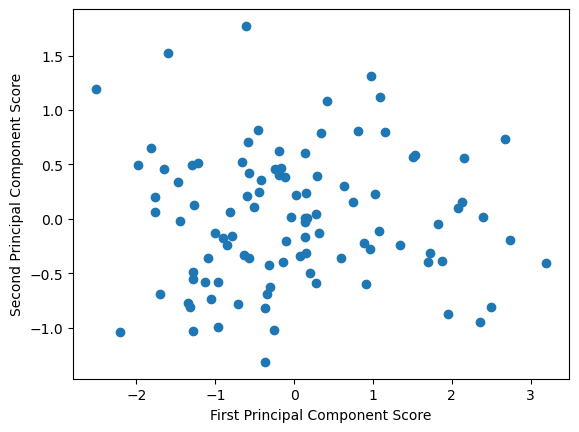

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

- **Q:** What can be said about the three outliers in the upper left corner of the graph? Is their first principal component score high or low? 
- **A:** These outliers have Low First Principal Component values (-1 to -2).

- **Q:** What about their second principal component score?
- **A:** These outliers have a high second principal component values (>1 or higher)
   
- **Q:** What does that mean about their values in `series_1`, `series_2`, and `series_3`?
- **A:** PC1 is heavily influenced by `series_1` (0.7991). The outliers low PC1 score suggest their values in `series_1` are low. PC2 is mostly influenced by `series_3`  The outliers' high PC2 score implies lower values in `series_3`.

- **Q:** It seems to me that you can say something about `series_3` (what can you say?) but you may have a harder time saying something about `series_1` and `series_2`, and an almost impossible time saying anything about the relative values of `series_1` and `series_2`.  Why is that?
- **A:** Since the components are linear combinations of the original features, the components are orthogonal/uncorrelated, but not easy to translate back into simple "larger than" comparisons unless we reconstruct the PCA-inverse.

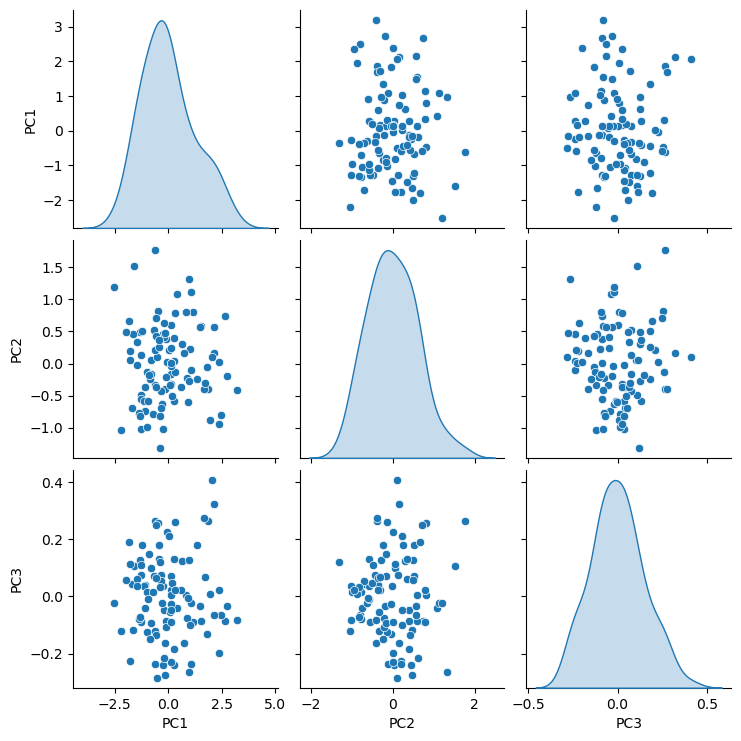

In [2]:
#make a dataframe of the principal component scores
pca_scores = pca3.transform(df)
pca_df = pd.DataFrame(pca_scores, columns = ['PC1', 'PC2', 'PC3'])

#make the pairplot
import seaborn as sns
sns.pairplot(pca_df, diag_kind = 'kde')
plt.show()

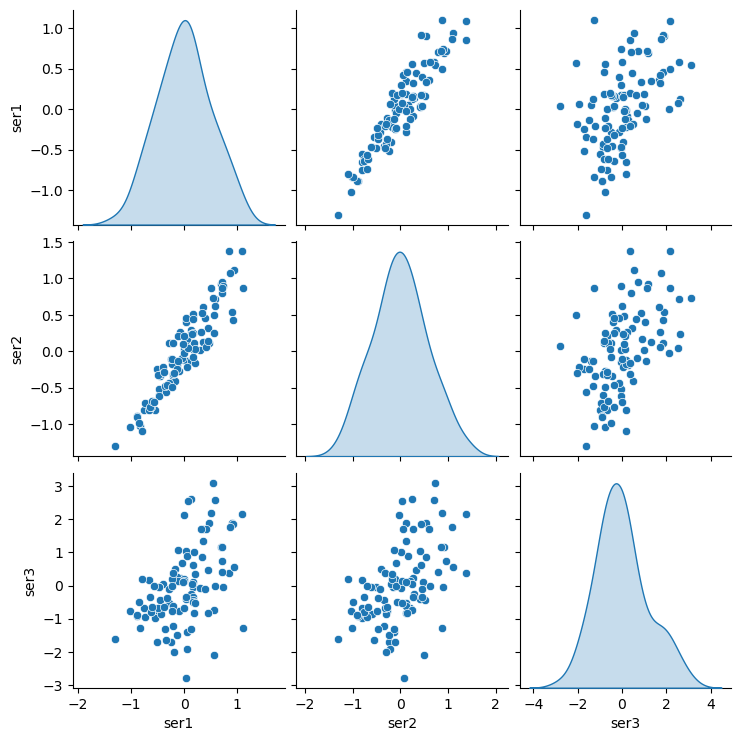

In [3]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

- **Q:** How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.
- **A:** From the pairplot of the pca (and the original dataframe) we can see that `series_1` and `series_2` are highly positively correlated.

- **Q:** Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?
    - **Advantages:**
        - Reduces 3D data into 2D while preserving most variance.
        - Helps reveal clusters or outliers (like the upper-left group).
        - Shows how the data varies along major directions of variation (PCA axes).
    - **Disadvantages:**
        - Interpretability: Hard to directly link back to original features without looking at component loadings.
        - You lose fine-grained info about individual features (e.g., exact values in series_1, etc.).
        - Outliers in PCA space may not always be outliers in original feature space.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [4]:
import os
import zipfile
from tqdm import tqdm
import itertools
import scipy.stats as ss

In [5]:
#comment out if you don't have cudf installed
%load_ext cudf.pandas
import pandas as pd

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
play_df = pd.read_csv('capstone_datasets/nfl-playing-surface-analytics/PlayList.csv')
player_df = pd.read_csv('capstone_datasets/nfl-playing-surface-analytics/PlayerTrackData.csv')
injury_df = pd.read_csv('capstone_datasets/nfl-playing-surface-analytics/InjuryRecord.csv')

In [8]:
!nvidia-smi # check if GPU is available

Sat Apr  5 22:01:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:01:00.0  On |                  Off |
|  0%   43C    P0             61W /  450W |   17860MiB /  24564MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
game_df = play_df[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']]
game_df = game_df.drop_duplicates()
game_df = game_df.reset_index(drop = True)
game_df

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear and warm,63
1,26624-2,Indoors,Synthetic,Mostly Cloudy,85
2,26624-3,Outdoor,Synthetic,Sunny,84
3,26624-4,Outdoor,Synthetic,Sunny,61
4,26624-5,Outdoor,Natural,Clear,76
...,...,...,...,...,...
5707,47888-9,Outdoor,Synthetic,Cloudy,53
5708,47888-10,Outdoor,Natural,Mostly Cloudy,82
5709,47888-11,Outdoors,Natural,Cloudy,42
5710,47888-12,Outdoor,Synthetic,Clear and cold,40


In [10]:
# Helper function to add value labels on bars
def add_value_labels(ax, spacing=5, decimals=0):
    """
    Add value labels to the end of each bar in a bar chart.

    Args:
        ax (matplotlib.axes.Axes): The axis object containing the bars.
        spacing (int): Distance between the labels and bars.
        decimals (int): Number of decimal places to format the labels.
    """
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        format_str = f"{{:.{decimals}f}}"
        label = format_str.format(y_value)

        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va
        )

# Main visualization function
def visualize_game_features(game_df, rotation=90, add_labels=False, figsize=(10, 10)):
    """
    Visualize basic game-level features: StadiumType, FieldType, Weather, Temperature.
    
    Args:
        game_df (DataFrame): Input dataframe with game features.
        rotation (int): Rotation angle for x-axis labels.
        add_labels (bool): Whether to add bar value labels.
        figsize (tuple): Size of the overall figure.
    """
    # Create figure and define layout
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(4, 3, hspace=0.4, wspace=0.3)

    # Create individual axes
    stadium_ax = fig.add_subplot(grid[0, :2])
    fieldtype_ax = fig.add_subplot(grid[0, 2])
    weather_ax = fig.add_subplot(grid[1, 0:])
    temperature_ax = fig.add_subplot(grid[2, 0:])
    temperature_box_ax = fig.add_subplot(grid[3, 0:])

    # --- Stadium Type Bar Chart ---
    stadium_keys = game_df.StadiumType.value_counts().keys()
    stadium_vals = game_df.StadiumType.value_counts().values

    stadium_ax.bar(stadium_keys, stadium_vals, color='#00c2c7')
    stadium_ax.set_title('Stadium Type')
    stadium_ax.set_xticks(range(len(stadium_keys)))
    stadium_ax.set_xticklabels(stadium_keys, rotation=rotation)

    if add_labels:
        add_value_labels(stadium_ax, spacing=5)

    # --- Field Type Bar Chart ---
    fieldtype_keys = game_df.FieldType.value_counts().keys()
    fieldtype_vals = game_df.FieldType.value_counts().values

    fieldtype_ax.bar(fieldtype_keys, fieldtype_vals, color=['#00c2c7', '#ff9e15'])
    fieldtype_ax.set_title('Field Type')
    fieldtype_ax.set_xticks(range(len(fieldtype_keys)))
    fieldtype_ax.set_xticklabels(fieldtype_keys, rotation=0)

    if add_labels:
        add_value_labels(fieldtype_ax, spacing=5)

    # --- Weather Bar Chart ---
    weather_keys = game_df.Weather.value_counts().keys()
    weather_vals = game_df.Weather.value_counts().values

    weather_ax.bar(weather_keys, weather_vals, color='#00c2c7')
    weather_ax.set_title('Weather')
    weather_ax.set_xticks(range(len(weather_keys)))
    weather_ax.set_xticklabels(weather_keys, rotation=rotation)

    if add_labels:
        add_value_labels(weather_ax, spacing=5)

    # --- Temperature Histogram ---
    temp_vals = game_df.Temperature.dropna().astype(int).values

    temperature_ax.hist(temp_vals, bins=30, range=(0, 90), color='#00c2c7', edgecolor='black')
    temperature_ax.set_xlim(0, 110)
    temperature_ax.set_xticks(range(0, 110, 10))
    temperature_ax.set_xticklabels(range(0, 110, 10))
    temperature_ax.set_title('Temperature (Histogram)')

    # --- Temperature Boxplot ---
    temperature_box_ax.boxplot(temp_vals, vert=False)
    temperature_box_ax.set_xlim(0, 110)
    temperature_box_ax.set_xticks(range(0, 110, 10))
    temperature_box_ax.set_xticklabels(range(0, 110, 10))
    temperature_box_ax.set_yticks([1])
    temperature_box_ax.set_yticklabels(['Temperature'])
    temperature_box_ax.set_title('Temperature (Boxplot)')

    # --- Overall Title ---
    plt.suptitle('Game-Level Feature Exploration', fontsize=16)
    plt.show()


In [11]:
import numpy as np
import re

# --- Helper function to clean Weather descriptions ---
def clean_weather(row):
    """
    Map messy weather descriptions into consistent categories: 
    'Clear', 'Cloudy', 'Rain', 'Snow', 'Indoor', or NaN.
    
    Args:
        row (Series): Row from the dataframe with a 'Weather' column.
        
    Returns:
        str or np.nan: Cleaned weather category.
    """
    cloudy_conditions = [
        'Cloudy 50% change of rain', 'Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
        'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
        'Mostly cloudy', 'Rain Chance 40%', ' Partly cloudy', 'Party Cloudy',
        'Rain likely, temps in low 40s', 'Partly Clouidy', 'Cloudy, 50% change of rain',
        'Mostly Coudy', '10% Chance of Rain', 'Cloudy, chance of rain', 
        '30% Chance of Rain', 'Cloudy, light snow accumulating 1-3"', 'cloudy', 
        'Coudy', 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Cloudy fog started developing in 2nd quarter', 'Cloudy light snow accumulating 1-3"',
        'Cloudywith periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
        'Cloudy and cold', 'Cloudy and Cool', 'Partly cloudy'
    ]

    clear_conditions = [
        'Clear, Windy', 'Clear to Cloudy', 'Clear, highs to upper 80s', 'Clear and clear',
        'Partly sunny', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny',
        'Clear Skies', 'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s',
        'Sun & clouds', 'Mostly sunny', 'Sunny, Windy', 'Mostly Sunny Skies',
        'Clear and Sunny', 'Clear and sunny', 'Clear to Partly Cloudy', 'Clear Skies',
        'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold',
        'Sunny and warm', 'Sunny and clear'
    ]

    rainy_conditions = [
        'Rainy', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain', 
        'Rain shower', 'Rain likely, temps in low 40s.', 'Cloudy, Rain'
    ]

    snow_conditions = ['Heavy lake effect snow']

    indoor_conditions = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']

    # Map the raw Weather values to categories
    if row.Weather in cloudy_conditions:
        return 'Cloudy'
    if row.Weather in indoor_conditions:
        return 'Indoor'
    if row.Weather in clear_conditions:
        return 'Clear'
    if row.Weather in rainy_conditions:
        return 'Rain'
    if row.Weather in snow_conditions:
        return 'Snow'
    if row.Weather in ['Cloudy.', 'Heat Index 95', 'Cold']:
        return np.nan

    # If not recognized, return the original
    return row.Weather

# --- Helper function to clean StadiumType descriptions ---
def clean_stadiumtype(row):
    """
    Clean specific StadiumType anomalies by setting them to NaN.
    
    Args:
        row (Series): Row from the dataframe with a 'StadiumType' column.
        
    Returns:
        str or np.nan: Cleaned stadium type.
    """
    if row.StadiumType in ['Bowl', 'Heinz Field', 'Cloudy']:
        return np.nan
    else:
        return row.StadiumType

# --- Main function to clean the dataframe ---
def clean_play_df(play_df):
    """
    Clean 'StadiumType' and 'Weather' fields of a play-level dataframe.
    
    Args:
        play_df (DataFrame): Raw input play dataframe.
        
    Returns:
        DataFrame: Cleaned play dataframe.
    """
    play_df_cleaned = play_df.copy()

    # --- Clean StadiumType ---
    # Standardize common StadiumType misspellings or formats using regex
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(
        r'Oudoor|Outdoors|Ourdoor|Outddors|Outdor|Outside', 'Outdoor', regex=True
    )
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(
        r'Indoors|Indoor, Roof Closed|Indoor, Open Roof', 'Indoor', regex=True
    )
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(
        r'Closed Dome|Domed, closed|Domed, Open|Domed, open|Dome, closed|Domed', 'Dome', regex=True
    )
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(
        r'Retr. Roof-Closed|Outdoor Retr Roof-Open|Retr. Roof - Closed|Retr. Roof-Open|Retr. Roof - Open|Retr. Roof Closed', 
        'Retractable Roof', regex=True
    )
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(
        'Open', 'Outdoor', regex=False
    )

    # Apply StadiumType anomaly cleaning
    play_df_cleaned['StadiumType'] = play_df_cleaned.apply(clean_stadiumtype, axis=1)

    # --- Clean Weather ---
    play_df_cleaned['Weather'] = play_df_cleaned.apply(clean_weather, axis=1)

    return play_df_cleaned


In [12]:
play_df_cleaned = clean_play_df(play_df)
game_df_cleaned = play_df_cleaned[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']]
game_df_cleaned = game_df_cleaned.drop_duplicates()
game_df_cleaned = game_df_cleaned.reset_index(drop = True)
game_df_cleaned

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear,63
1,26624-2,Indoor,Synthetic,Cloudy,85
2,26624-3,Outdoor,Synthetic,Clear,84
3,26624-4,Outdoor,Synthetic,Clear,61
4,26624-5,Outdoor,Natural,Clear,76
...,...,...,...,...,...
5707,47888-9,Outdoor,Synthetic,Cloudy,53
5708,47888-10,Outdoor,Natural,Cloudy,82
5709,47888-11,Outdoor,Natural,Cloudy,42
5710,47888-12,Outdoor,Synthetic,Clear,40


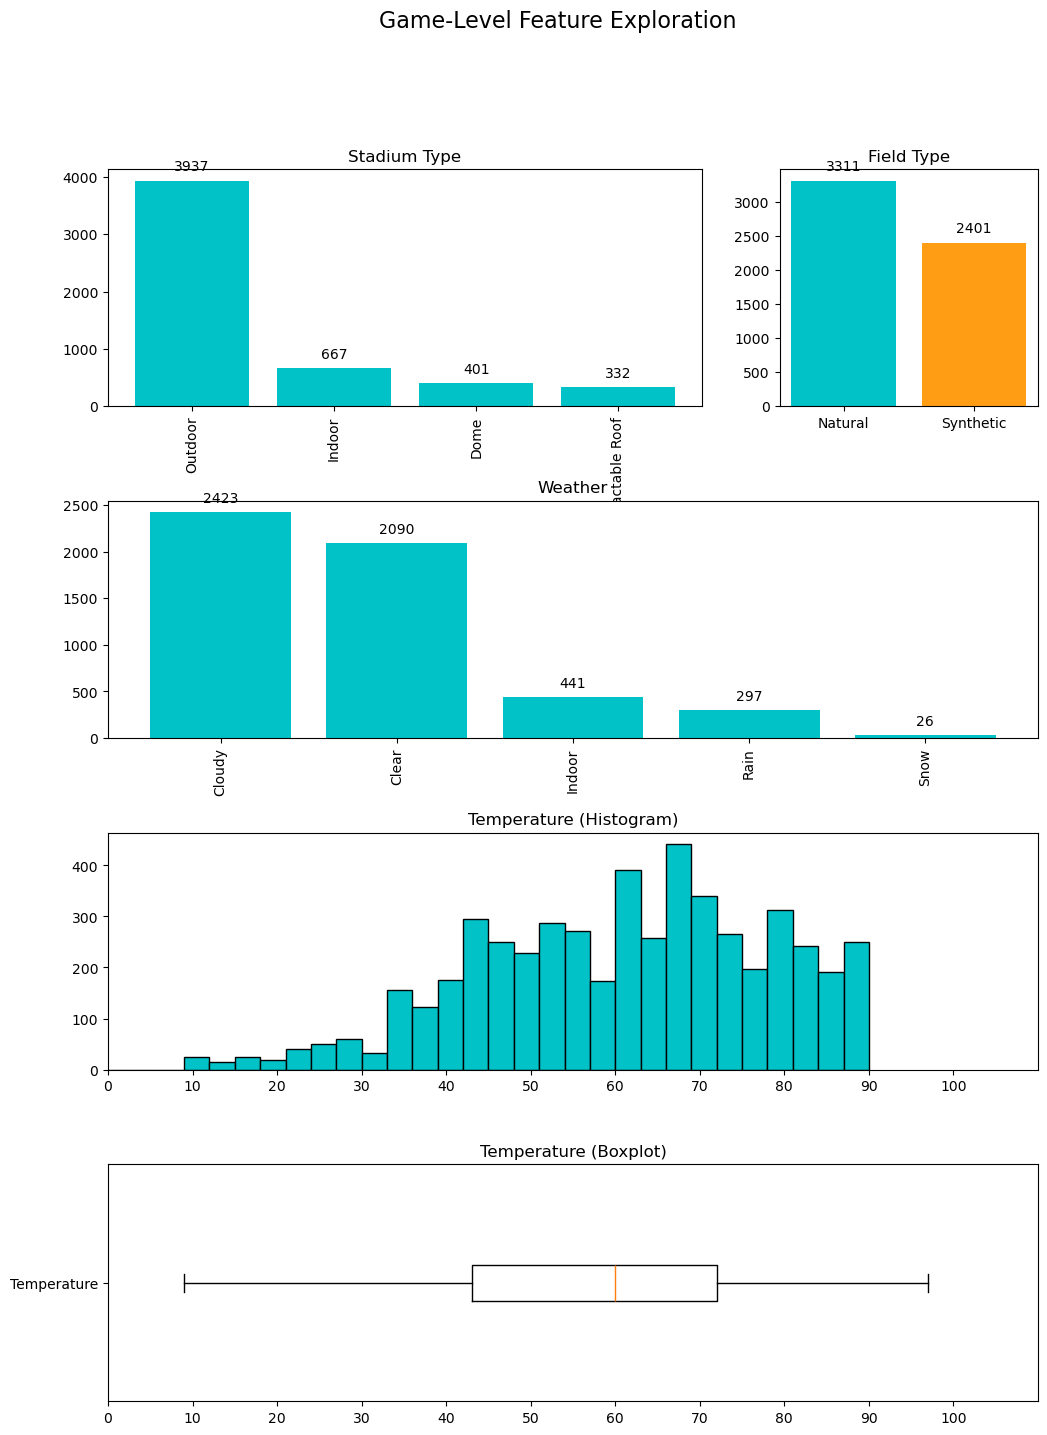

In [13]:
visualize_game_features(game_df_cleaned, rotation=90, add_labels=True, figsize=(12, 16))

### Draw heatmaps
We'll Take a look at the most visited areas of the field this week, trying to get some more info about player movement

In [14]:
def visualize_field_heatmap(player_df, xbins=13, ybins=6, annotate=False):
    """
    Visualize a heatmap showing the most visited areas of the football field.

    Args:
        player_df (DataFrame): DataFrame containing 'x' and 'y' coordinates of player positions.
        xbins (int): Number of horizontal bins (field lengthwise).
        ybins (int): Number of vertical bins (field widthwise).
        annotate (bool): Whether to annotate the heatmap cells with counts.
    """
    # Create bin edges
    x = np.linspace(0, 120, xbins)
    y = np.linspace(0, 53, ybins)
    
    # Initialize empty heatmap grid
    hmap = np.zeros((xbins, ybins))
    
    # Count points in each grid cell
    for i in range(xbins - 1):
        for j in range(ybins - 1):
            hmap[i, j] = len(
                player_df[
                    (player_df.x >= x[i]) & (player_df.x <= x[i + 1]) &
                    (player_df.y >= y[j]) & (player_df.y <= y[j + 1])
                ]
            )

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(
        np.transpose(hmap),  # Transpose to match field orientation
        annot=annotate,
        fmt='.0f',
        cmap='coolwarm',     # Optional: change color map for better field feel
        ax=ax
    )
    
    ax.set_title('Field Heatmap\nMost visited areas of the field are highlighted', fontsize=14)
    plt.xlabel('Field Length (yards)')
    plt.ylabel('Field Width (yards)')
    plt.show()


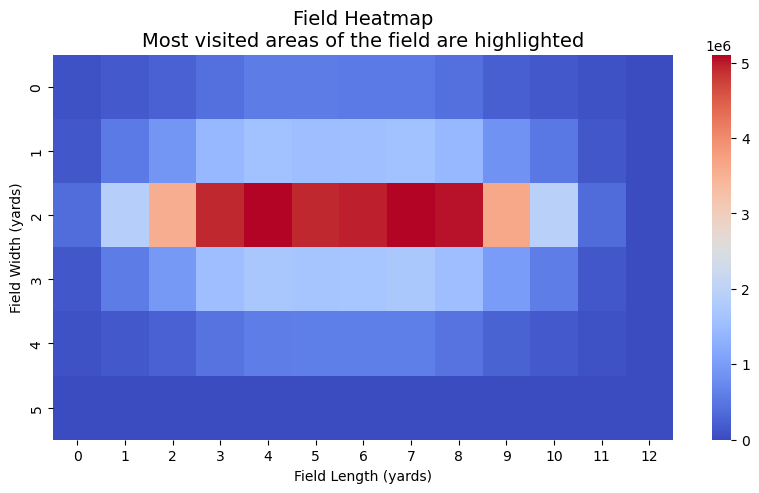

In [15]:
visualize_field_heatmap(player_df) #you can see some areas of the field are more 'busy' than others (presumably the line of srimmage)

In [16]:
# --- Join cleaned game dataset with injury dataset ---
game_injury_df = (
    injury_df.set_index('GameID')
    .join(game_df_cleaned.set_index('GameID'), how='outer')
)

# --- Fill missing injury columns with zeros and convert to integer ---
for col in ['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']:
    game_injury_df[col] = game_injury_df[col].fillna(0).astype(int)

# --- Adjust injury metrics by subtracting later windows ---
game_injury_df['DM_M1']  = game_injury_df['DM_M1']  - game_injury_df['DM_M7']
game_injury_df['DM_M7']  = game_injury_df['DM_M7']  - game_injury_df['DM_M28']
game_injury_df['DM_M28'] = game_injury_df['DM_M28'] - game_injury_df['DM_M42']

# --- Introduce an 'Injury' flag indicating any injury ---
game_injury_df['Injury'] = (
    game_injury_df['DM_M1'] +
    game_injury_df['DM_M7'] +
    game_injury_df['DM_M28'] +
    game_injury_df['DM_M42']
)

# --- Drop unnecessary columns ---
game_injury_df = game_injury_df.drop(columns=['Surface', 'PlayerKey', 'PlayKey']).copy()

# --- Create dummy variables (one-hot encoding) ---
game_injury_df_dummies = (
    pd.get_dummies(game_injury_df, dummy_na=True, drop_first=True)
    .drop(columns=['FieldType_nan'])
)


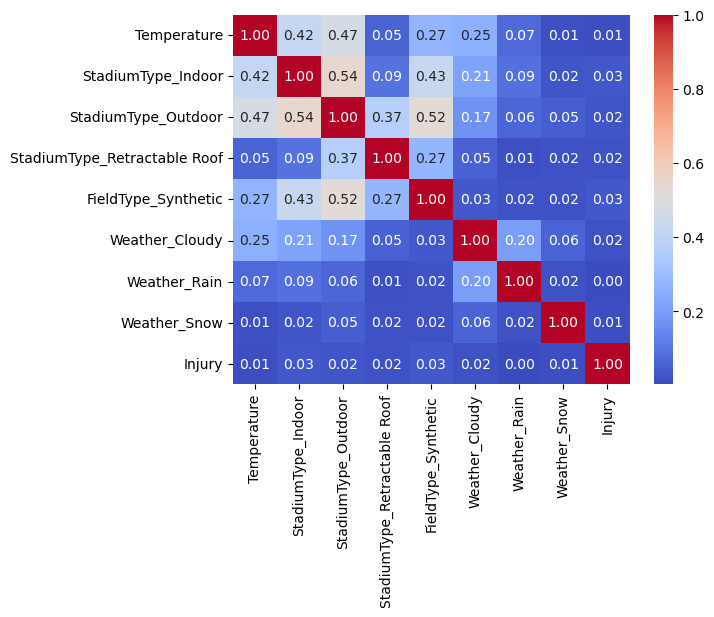

In [17]:
# Correlation matrix
corr_df = game_injury_df_dummies[['Temperature', 'StadiumType_Indoor', 
                                  'StadiumType_Outdoor', 'StadiumType_Retractable Roof',
                                  'FieldType_Synthetic', 'Weather_Cloudy', 
                                  'Weather_Rain', 'Weather_Snow', 
                                  'Injury']]
corr_df = corr_df.corr().abs()

sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=corr_df.columns, yticklabels=corr_df.columns)
plt.show()


In [18]:
# --- Join cleaned play dataset with injury dataset on PlayKey ---
play_injury_df = (
    injury_df.dropna(subset=['PlayKey'])
    .set_index('PlayKey')
    .join(
        play_df_cleaned.set_index('PlayKey'), 
        how='outer', 
        lsuffix='_left', 
        rsuffix='_right'
    )
)

# --- Fill missing injury columns with zeros and convert to integer ---
for col in ['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']:
    play_injury_df[col] = play_injury_df[col].fillna(0).astype(int)

# --- Adjust injury metrics by subtracting later windows ---
play_injury_df['DM_M1']  = play_injury_df['DM_M1']  - play_injury_df['DM_M7']
play_injury_df['DM_M7']  = play_injury_df['DM_M7']  - play_injury_df['DM_M28']
play_injury_df['DM_M28'] = play_injury_df['DM_M28'] - play_injury_df['DM_M42']

# --- Introduce an 'Injury' flag indicating any injury occurrence ---
play_injury_df['Injury'] = (
    play_injury_df['DM_M1'] +
    play_injury_df['DM_M7'] +
    play_injury_df['DM_M28'] +
    play_injury_df['DM_M42']
)

# --- Drop duplicated surface column (already exists elsewhere) ---
play_injury_df = play_injury_df.drop(columns=['Surface']).copy()

# --- Create dummy variables for PlayType and PositionGroup ---
play_injury_df_dummies = pd.get_dummies(
    play_injury_df,
    columns=['PlayType', 'PositionGroup'],
    dummy_na=True,
    drop_first=True
)


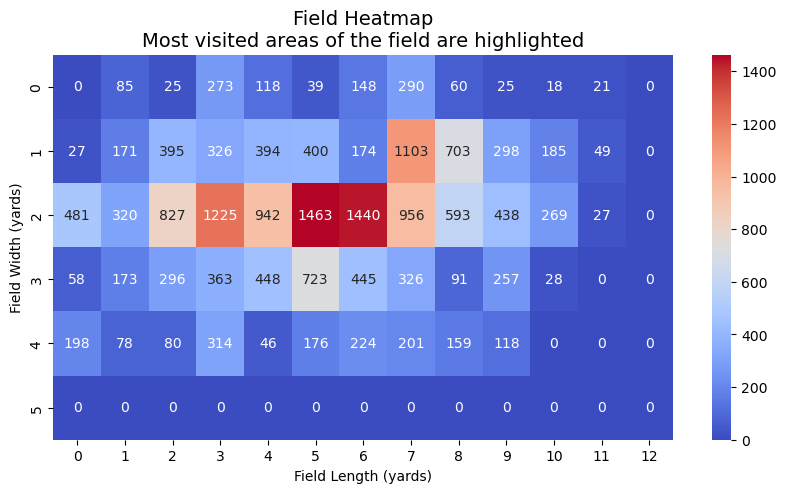

In [19]:
# find the keys of the plays related to injuries
play_injuries = play_injury_df.reset_index().dropna()[['PlayKey']]

# merge the playkeys associated with injuries with players' positions
player_injuries = player_df.merge(play_injuries, on='PlayKey', how = 'inner') # use inner join!

# visualize the heatmap
visualize_field_heatmap( player_injuries, annotate = True )

In [20]:
def visualize_field_kde(player_df):
    # plot kde
    fig = plt.figure(figsize=(10,5))
    ax = sns.jointplot(x="x", y="y", data=player_df, kind="kde")
    plt.show()

<Figure size 1000x500 with 0 Axes>

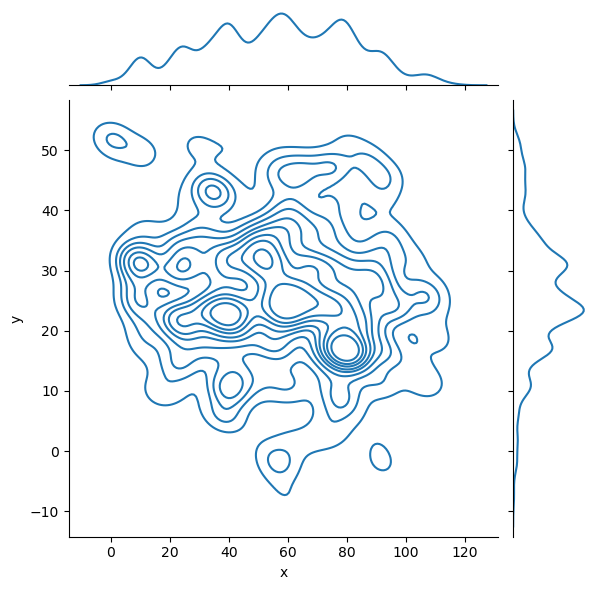

In [21]:
visualize_field_kde(player_injuries)

In [22]:
# reset index 
features_df = play_injury_df.copy().reset_index()
# drop the irrelevant columns
features_df = features_df.drop(columns=['PlayerKey_left','GameID_left','BodyPart', 'PlayKey', 'PlayerKey_right', 'GameID_right','DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'])
# convert into dummies
features_df = pd.get_dummies(features_df, dummy_na = False, drop_first = True)
features_df

,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,Injury,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,...,Position_WR,PositionGroup_DL,PositionGroup_LB,PositionGroup_Missing Data,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
0,1,1,63,1,0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,1,63,10,0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,1,1,63,11,0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,1,1,63,12,0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,1,1,63,13,0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267001,71,9,53,54,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267002,71,9,53,6,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267003,71,9,53,7,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267004,71,9,53,8,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
def create_motion_data_df(injury_df, play_df, player_df):
    """
    Create a motion-aggregated dataframe by combining player, play, and injury data.

    Args:
        injury_df (DataFrame): Injury-level dataset.
        play_df (DataFrame): Play-level dataset.
        player_df (DataFrame): Player tracking dataset (includes motion features).

    Returns:
        DataFrame: Merged dataset with motion data aggregated at the play level.
    """
    # --- Create a new field: angle between orientation and direction ---
    player_df['angle'] = player_df['o'] - player_df['dir']

    # --- Group motion features by PlayKey ---
    # Maximum values per play
    grouped_max = (
        player_df[['PlayKey', 'time', 'dir', 'dis', 'o', 's', 'angle']]
        .groupby('PlayKey')
        .max()
    )

    # Average values per play
    grouped_avg = (
        player_df[['PlayKey', 'time', 'dir', 'dis', 'o', 's', 'angle']]
        .groupby('PlayKey')
        .mean()
    )

    # --- Merge aggregated motion features back into play data ---
    play_df = play_df.merge(
        grouped_max.reset_index(),
        on='PlayKey'
    ).merge(
        grouped_avg.reset_index(),
        on='PlayKey',
        suffixes=('_max', '_avg')
    )

    # --- Merge with injury data (dropping unnecessary columns first) ---
    injury_df_cleaned = injury_df.drop(
        columns=['PlayerKey', 'GameID', 'BodyPart', 'Surface']
    )

    merged_df = injury_df_cleaned.merge(
        play_df, on='PlayKey', how='outer'
    ).fillna(0)

    return merged_df


In [24]:
motion_df = create_motion_data_df(injury_df, play_df, player_df)
# Select injury columns automatically
injury_cols = [col for col in motion_df.columns if col.startswith('DM_M')]

# Sum across them to create the Injury flag
motion_df['Injury'] = motion_df[injury_cols].sum(axis=1)
motion_df.head()

,PlayKey,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey,GameID,RosterPosition,PlayerDay,PlayerGame,...,o_max,s_max,angle_max,time_avg,dir_avg,dis_avg,o_avg,s_avg,angle_avg,Injury
0,26624-1-1,0,0,0,0,26624,26624-1,Quarterback,1,1,...,267.03,2.94,265.19,14.90,186.148361,0.056288,182.479766,0.535753,-3.668595,0
1,26624-1-10,0,0,0,0,26624,26624-1,Quarterback,1,1,...,315.08,3.18,260.69,13.75,199.524167,0.061848,200.858225,0.576304,1.334058,0
2,26624-1-11,0,0,0,0,26624,26624-1,Quarterback,1,1,...,358.20,2.94,314.68,18.40,201.652520,0.084553,188.591789,0.795772,-13.060732,0
3,26624-1-12,0,0,0,0,26624,26624-1,Quarterback,1,1,...,302.26,1.83,299.54,17.80,174.236134,0.041176,215.746975,0.349692,41.510840,0
4,26624-1-13,0,0,0,0,26624,26624-1,Quarterback,1,1,...,356.69,1.49,295.07,12.75,176.954727,0.051797,189.170742,0.427109,12.216016,0


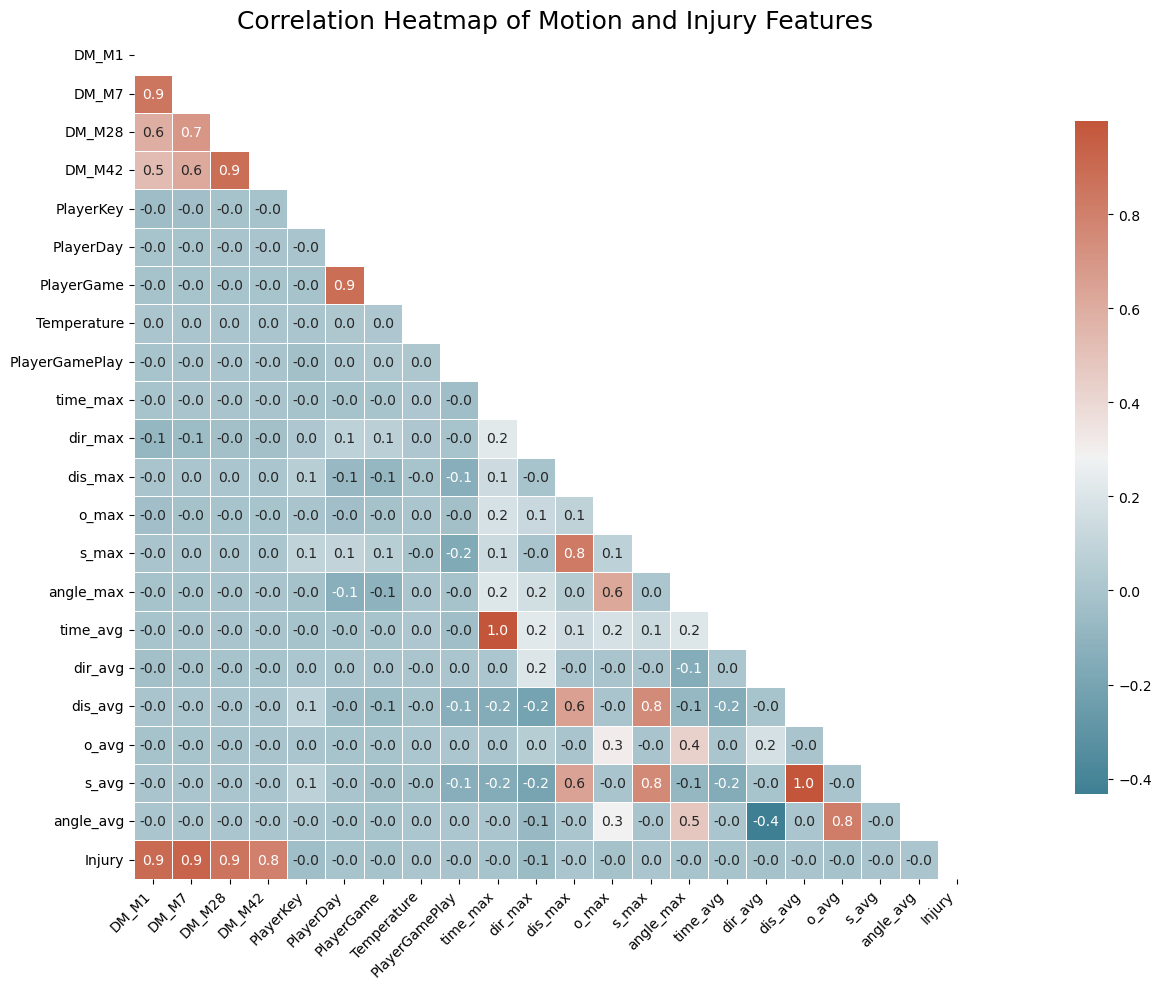

In [25]:
# --- Select only numeric columns and compute correlation matrix ---
corr_df = motion_df.select_dtypes(include=['number']).corr()

# --- Create a mask for the upper triangle ---
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# --- Plot the masked heatmap ---
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    corr_df,
    mask=mask,                         # <-- mask the upper triangle
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    annot=True,
    fmt='.1f',
    square=True,
    linewidths=0.5,                     # <-- adds clean grid lines
    cbar_kws={"shrink": 0.8},           # <-- shrink colorbar a bit
    ax=ax,
    xticklabels=corr_df.columns, 
    yticklabels=corr_df.columns
)

ax.set_title('Correlation Heatmap of Motion and Injury Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
# create a copy for the rest of our analysis
motion_df_cleaned = motion_df.copy()
motion_df_cleaned['s_max'] = pd.to_numeric(motion_df_cleaned['s_max'], errors='coerce')
print(motion_df_cleaned['s_max'].dtype) # check the type of the column

float64


In [27]:
#drop id columns
motion_df_cleaned = motion_df_cleaned.drop(columns=['PlayKey', 'GameID', 'PlayerKey'])

#one-hot encode categorical variables
motion_df_encoded = pd.get_dummies(
    motion_df_cleaned,
    columns=['RosterPosition', 'StadiumType', 'FieldType', 'Weather', 'PlayType', 'Position', 'PositionGroup'],
    dummy_na=True,
    drop_first=True
)

motion_df_encoded.head()

,DM_M1,DM_M7,DM_M28,DM_M42,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,time_max,dir_max,...,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
0,0,0,0,0,1,1,63,1,29.8,337.87,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,0,1,1,63,10,27.5,353.24,...,False,False,False,False,False,True,False,False,False,False
2,0,0,0,0,1,1,63,11,36.8,357.78,...,False,False,False,False,False,True,False,False,False,False
3,0,0,0,0,1,1,63,12,35.6,359.97,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,0,1,1,63,13,25.5,357.43,...,False,False,False,False,False,True,False,False,False,False


### Draw bubble plots.

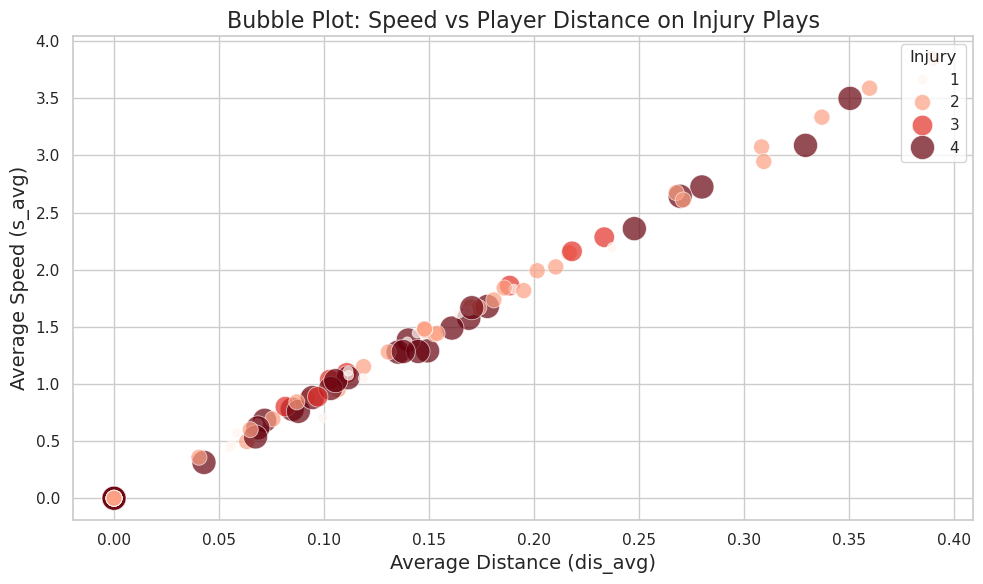

In [28]:
# Set a nicer theme
sns.set_theme(style='whitegrid')

# Create a bubble plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=motion_df[motion_df['Injury'] > 0],  # only injured plays
    x='dis_avg',
    y='s_avg',
    size='Injury',
    hue='Injury',
    palette='Reds',
    sizes=(50, 300),
    alpha=0.7,
    edgecolor='w'
)


plt.title('Bubble Plot: Speed vs Player Distance on Injury Plays', fontsize=16)
plt.xlabel('Average Distance (dis_avg)', fontsize=14)
plt.ylabel('Average Speed (s_avg)', fontsize=14)
plt.legend(title='Injury', loc='upper right')
plt.tight_layout()
plt.show()


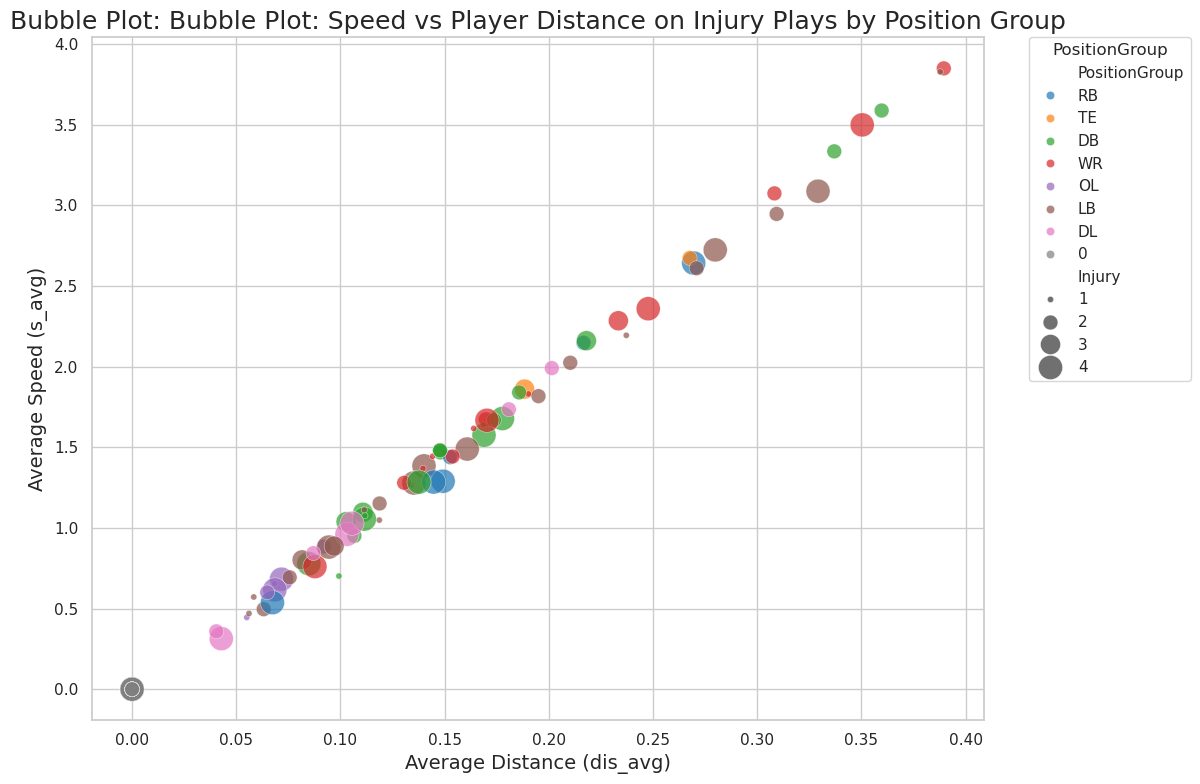

In [29]:
# Make sure PositionGroup is clean
motion_df['PositionGroup'] = motion_df['PositionGroup'].fillna('Unknown')

# Create the bubble plot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=motion_df[motion_df['Injury'] > 0],  # only injured plays,
    x='dis_avg',               # x-axis: average distance
    y='s_avg',                 # y-axis: average speed
    size='Injury',             # bubble size based on Injury
    hue='PositionGroup',       # bubble color based on PositionGroup
    palette='tab10',           # 10-class categorical color map
    sizes=(20, 300),           # smaller size range
    alpha=0.7,
    edgecolor='w'
)

plt.title('Bubble Plot: Bubble Plot: Speed vs Player Distance on Injury Plays by Position Group', fontsize=18)
plt.xlabel('Average Distance (dis_avg)', fontsize=14)
plt.ylabel('Average Speed (s_avg)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='PositionGroup')
plt.tight_layout()
plt.show()


### Principal Component Analysis - Perform Principal Component Analysis to find out the directions in which the data varies.



### Can your Represent the data using only its projection onto the first principal component, using the methods described in week 8, How much of the variance would this capture?

PS Note - Ths target variable of this data set ("Injury") is an incredibly poor fit for linear regression. we'll build a different subset of the data and test something that is a better fit for that algorithm - I'm gonna go with 'max_speed', given player position and the other motion data - should be easier to follow and work with 

In [30]:
player_df.head()

,PlayKey,time,event,x,y,dir,dis,o,s,angle
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13,-25.91
1,26624-1-1,0.1,<NA>,87.45,28.92,283.91,0.01,261.69,0.12,-22.22
2,26624-1-1,0.2,<NA>,87.44,28.92,280.40,0.01,261.17,0.12,-19.23
3,26624-1-1,0.3,<NA>,87.44,28.92,278.79,0.01,260.66,0.10,-18.13
4,26624-1-1,0.4,<NA>,87.44,28.92,275.44,0.01,260.27,0.09,-15.17


In [31]:
game_df.head()

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear and warm,63
1,26624-2,Indoors,Synthetic,Mostly Cloudy,85
2,26624-3,Outdoor,Synthetic,Sunny,84
3,26624-4,Outdoor,Synthetic,Sunny,61
4,26624-5,Outdoor,Natural,Clear,76


In [32]:
play_df

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,54,DB,DB


In [33]:
# set up our new dataset
player_df_grouped = player_df.groupby('PlayKey').agg({
    's': ['mean', 'max', 'std'],
    'x': ['min', 'max', 'mean'],
    'y': ['min', 'max', 'mean']
})

player_df_grouped = player_df_grouped.reset_index()
player_df_grouped.columns = ['PlayKey', 's_mean', 's_max', 's_std', 'x_min', 'x_max', 'x_mean', 'y_min', 'y_max', 'y_mean']
player_df_grouped = player_df_grouped.merge(play_df[['PlayKey', 'RosterPosition', 'FieldType', 'PlayType']], left_on='PlayKey', right_on='PlayKey', how='left')


In [34]:
# pick out target and features
X = player_df_grouped.drop(columns=['PlayKey', 's_max'])
y = player_df_grouped['s_max']
X = pd.get_dummies(X, columns=['RosterPosition', 'FieldType', 'PlayType'], drop_first=True)
X.head()

,s_mean,s_std,x_min,x_max,x_mean,y_min,y_max,y_mean,RosterPosition_Defensive Lineman,RosterPosition_Kicker,...,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush
0,0.535753,0.608942,84.36,91.49,87.665753,23.62,29.85,28.221104,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.576304,0.642887,13.39,18.56,15.893188,22.07,27.49,24.006486,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.795772,0.738191,7.16,19.65,13.429593,22.56,28.18,24.698211,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.349692,0.428258,45.55,49.93,46.824706,20.87,24.66,22.817115,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.427109,0.404819,45.20,49.21,47.015586,21.53,23.97,22.936367,False,False,...,False,False,False,False,False,True,False,False,False,False


In [35]:
# prep data for PCA
bool_cols = X.select_dtypes(include=['bool']).columns
# Convert boolean columns to integers
X[bool_cols] = X[bool_cols].astype(int)
X.head()

,s_mean,s_std,x_min,x_max,x_mean,y_min,y_max,y_mean,RosterPosition_Defensive Lineman,RosterPosition_Kicker,...,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush
0,0.535753,0.608942,84.36,91.49,87.665753,23.62,29.85,28.221104,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.576304,0.642887,13.39,18.56,15.893188,22.07,27.49,24.006486,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.795772,0.738191,7.16,19.65,13.429593,22.56,28.18,24.698211,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.349692,0.428258,45.55,49.93,46.824706,20.87,24.66,22.817115,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.427109,0.404819,45.20,49.21,47.015586,21.53,23.97,22.936367,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# make a copy for linear regression comparison
X_pca = X.copy()
#scale the data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Fit PCA
pca = PCA(n_components=1)
pca.fit(X_pca_scaled)

# get first principal component
PC1 = pca.components_[0]

# Project data onto PC1
projections = X_pca_scaled @ PC1  # or np.dot(X_scaled, PC1)

# 5. Reconstruct the data using only PC1
X__pca_reconstructed = np.outer(projections, PC1)

# 6. How much variance is captured?
variance_pc1 = pca.explained_variance_ratio_[0]
print(f"Variance captured by PC1: {variance_pc1:.4f} ({variance_pc1 * 100:.2f}%)")

Variance captured by PC1: 0.1049 (10.49%)


No, representing the data using only its projection onto the first principal component is not sufficient. The first principal component only captures 10.5% of the total variance, meaning that significant information would be lost.

### Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

*Note - this dataset is not a good fit for linear regression*, see above note

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R^2 score: 0.8978
Mean Squared Error: 0.4207


In [38]:
# Get feature importances (coefficients)
feature_importance = model.coef_

# Match back to feature names
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values(by='importance', key=abs, ascending=False)

print(importance_df)

                             feature  importance
1                              s_std    2.615372
18              PlayType_Extra Point   -1.172761
19               PlayType_Field Goal   -1.062474
21     PlayType_Kickoff Not Returned   -0.929035
24                     PlayType_Punt   -0.768799
26            PlayType_Punt Returned   -0.751246
25        PlayType_Punt Not Returned   -0.734006
11  RosterPosition_Offensive Lineman   -0.719164
22         PlayType_Kickoff Returned   -0.590878
20                  PlayType_Kickoff   -0.552026
12        RosterPosition_Quarterback   -0.492080
27                     PlayType_Rush   -0.480194
8   RosterPosition_Defensive Lineman   -0.448526
23                     PlayType_Pass   -0.339044
15          RosterPosition_Tight End   -0.293964
16      RosterPosition_Wide Receiver   -0.214733
0                             s_mean   -0.190728
13       RosterPosition_Running Back   -0.183235
10         RosterPosition_Linebacker   -0.144411
14             Roste

In [39]:
# Week 8-style feature correlation/comparison
columns = X.columns
results = []

for i, col_target in enumerate(columns):
    best_score = -np.inf
    best_predictor = None
    
    # Loop through all other columns as predictors
    for col_predictor in columns:
        if col_target == col_predictor:
            continue  # don't predict a feature from itself
        
        # Predictor column must be reshaped into 2D
        X_single = X[[col_predictor]]  # make it a dataframe, not a series
        y_single = X[col_target]
        
        # Fit linear regression
        model = LinearRegression()
        model.fit(X_single, y_single)
        
        preds = model.predict(X_single)
        
        # Compute R^2 score (or you could use correlation coefficient if you want)
        score = r2_score(y_single, preds)
        
        if score > best_score:
            best_score = score
            best_predictor = col_predictor
    
    # Save the best predictor for this target feature
    results.append({
        'Target Feature': col_target,
        'Best Predictor': best_predictor,
        'Best R^2 Score': best_score
    })

# Compile results into a dataframe
summary_df = pd.DataFrame(results)
summary_df


,Target Feature,Best Predictor,Best R^2 Score
0,s_mean,s_std,0.666351
1,s_std,s_mean,0.666351
2,x_min,x_mean,0.916246
3,x_max,x_mean,0.916559
4,x_mean,x_max,0.916559
5,y_min,y_mean,0.641600
6,y_max,y_mean,0.640430
7,y_mean,y_min,0.641600
8,RosterPosition_Defensive Lineman,s_mean,0.031068
9,RosterPosition_Kicker,PlayType_Extra Point,0.007283


Our results are actually pretty good here, but maybe a little misleading as we haven't dropped the s_std from our dataset yet. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

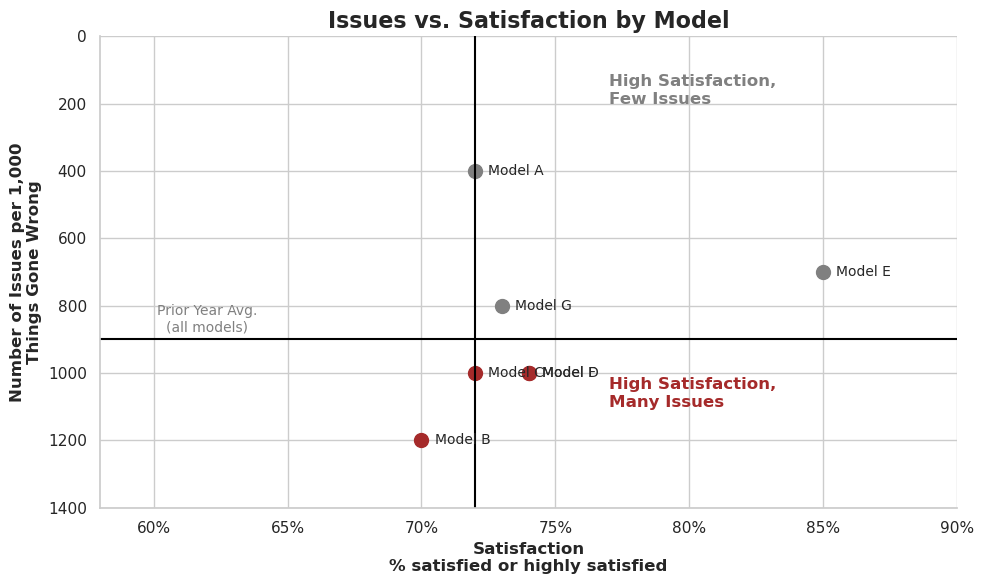

In [40]:
# Data from your image
models = ['Model A', 'Model G', 'Model E', 'Model C', 'Model D', 'Model F', 'Model B']
satisfaction = [72, 73, 85, 72, 74, 74, 70]  # x-axis: % satisfied
issues = [400, 800, 700, 1000, 1000, 1000, 1200]  # y-axis: number of issues per 1,000

# Colors: grey for models A, G, E; red for models C, D, F, B
colors = ['grey', 'grey', 'grey', 'brown', 'brown', 'brown', 'brown']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter points
for i in range(len(models)):
    ax.scatter(satisfaction[i], issues[i], color=colors[i], s=100)
    ax.text(satisfaction[i]+0.5, issues[i], models[i], verticalalignment='center', fontsize=10)

# Horizontal and vertical reference lines
ax.axhline(900, color='black')  # y=900 is "Prior Year Avg."
ax.axvline(72, color='black')   # x=72 is satisfaction split

# Annotations
ax.text(62, 875, 'Prior Year Avg.\n(all models)', ha='center', fontsize=10, color='gray')

# Quadrant labels
ax.text(77, 200, 'High Satisfaction,\nFew Issues', fontsize=12, fontweight='bold', color='gray')
ax.text(77, 1100, 'High Satisfaction,\nMany Issues', fontsize=12, fontweight='bold', color='brown')

# Axis labels
ax.set_xlabel('Satisfaction\n% satisfied or highly satisfied', fontsize=12, weight='bold')
ax.set_ylabel('Number of Issues per 1,000\nThings Gone Wrong', fontsize=12, weight='bold')

# Title
ax.set_title('Issues vs. Satisfaction by Model', fontsize=16, weight='bold')

# Axis limits and ticks
ax.set_xlim(58, 90)
ax.set_ylim(1400, 0)  # Reverse y-axis (because "few" issues are at the top)

# X-axis ticks
ax.set_xticks([60, 65, 70, 75, 80, 85, 90])
ax.set_xticklabels(['60%', '65%', '70%', '75%', '80%', '85%', '90%'])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
